In [1]:
import os
import tempfile

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

ratings = tfds.load("movielens/100k-ratings", split="train")
movies = tfds.load("movielens/100k-movies", split="train")

In [2]:
# print ratings 1 row
for x in ratings.take(1).as_numpy_iterator():
    print(x)

{'bucketized_user_age': 45.0, 'movie_genres': array([7], dtype=int64), 'movie_id': b'357', 'movie_title': b"One Flew Over the Cuckoo's Nest (1975)", 'raw_user_age': 46.0, 'timestamp': 879024327, 'user_gender': True, 'user_id': b'138', 'user_occupation_label': 4, 'user_occupation_text': b'doctor', 'user_rating': 4.0, 'user_zip_code': b'53211'}


In [4]:
# print movies 1 row
for x in movies.take(1).as_numpy_iterator():
    print(x)

{'movie_genres': array([4], dtype=int64), 'movie_id': b'1681', 'movie_title': b'You So Crazy (1994)'}


In [11]:
# data analysis
num_movies = movies.reduce(0, lambda x, _: x + 1).numpy()
num_users = ratings.reduce(0, lambda x, _: x + 1).numpy()
print(f"Number of movies: {num_movies}")
print(f"Number of users: {num_users}")

Number of movies: 1682
Number of users: 100000


In [15]:
import pandas as pd  # pandas is a data manipulation library
import numpy as np  #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt  # data visualization library

In [16]:
# lets explore movies.csv
data = pd.read_csv('movies.csv')
data.shape

(27278, 3)

In [17]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [19]:
#number of unique movies
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [20]:
# lets explore ratings.CSV
ratings_data = pd.read_csv('ratings.csv', sep=',')
ratings_data.shape

(1048575, 4)

In [21]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [22]:
#minimum rating given to a movie
ratings_data['rating'].min()

0.5

In [23]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [24]:
# checking movies.csv
data.shape

(27278, 3)

In [25]:
#is any row null
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [26]:
#checking ratings.csv
ratings_data.shape

(1048575, 4)

In [27]:
#is any row null there
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [30]:
# filtering to get the list of drama movies
c_movies = data['genres'].str.contains('Comedy')
data[c_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [31]:
#total number of drama movies
c_movies.shape

(27278,)

In [32]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data = data.merge(ratings_data, on='movieId', how='inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871


In [33]:
#displays high rated movies
high_rated = movie_data_ratings_data['rating'] > 4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0,846509445
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0,859325696
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,1144058408
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5,1380400521
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0,1317331523
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0,832543433


In [34]:
# displays low rated movies
low_rated = movie_data_ratings_data['rating'] < 4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating,timestamp
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,990969772
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0,994638157
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0,1424733487
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0,1239940397
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0,858458513


In [35]:
#total number of unique movie genre
unique_genre = data['genres'].unique().tolist()
len(unique_genre)

1342

In [36]:
#top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Pulp Fiction (1994)                                                               3498
Forrest Gump (1994)                                                               3476
Silence of the Lambs, The (1991)                                                  3247
Shawshank Redemption, The (1994)                                                  3216
Jurassic Park (1993)                                                              3129
Star Wars: Episode IV - A New Hope (1977)                                         2874
Braveheart (1995)                                                                 2799
Terminator 2: Judgment Day (1991)                                                 2711
Matrix, The (1999)                                                                2705
Schindler's List (1993)                                                           2598
Toy Story (1995)                                                                  2569
Fugitive, The (1993)                 

In [37]:
#slicing out columns to display only title and genres columns from movies.csv
data[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [38]:
# here we extract year from title
data['year'] = data['title'].str.extract('.*\((.*)\).*', expand=False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [39]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords:
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k, v in keyword_count.items():
        keyword_occurences.append([k, v])
    keyword_occurences.sort(key=lambda x: x[1], reverse=True)
    return keyword_occurences, keyword_count

In [40]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [41]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

In [42]:
from wordcloud import WordCloud, STOPWORDS  #used to generate world cloud

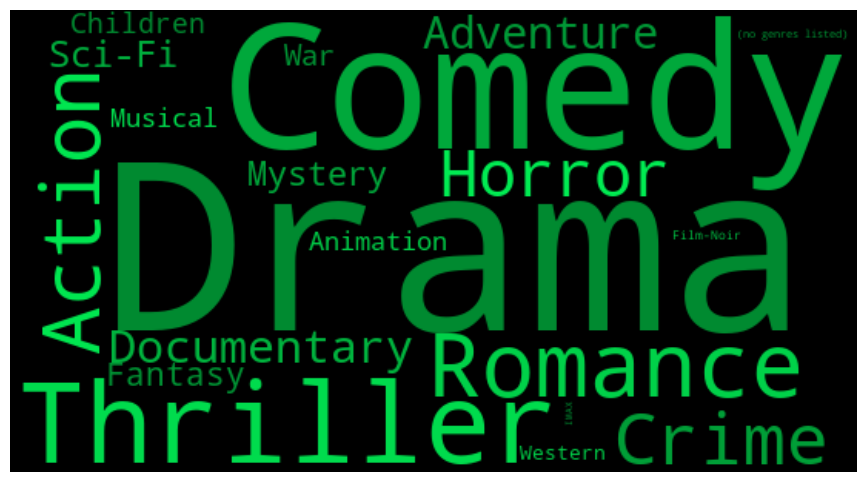

In [43]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100  # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550, height=300, background_color='black',
                      max_words=1628, relative_scaling=0.7,
                      color_func=random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

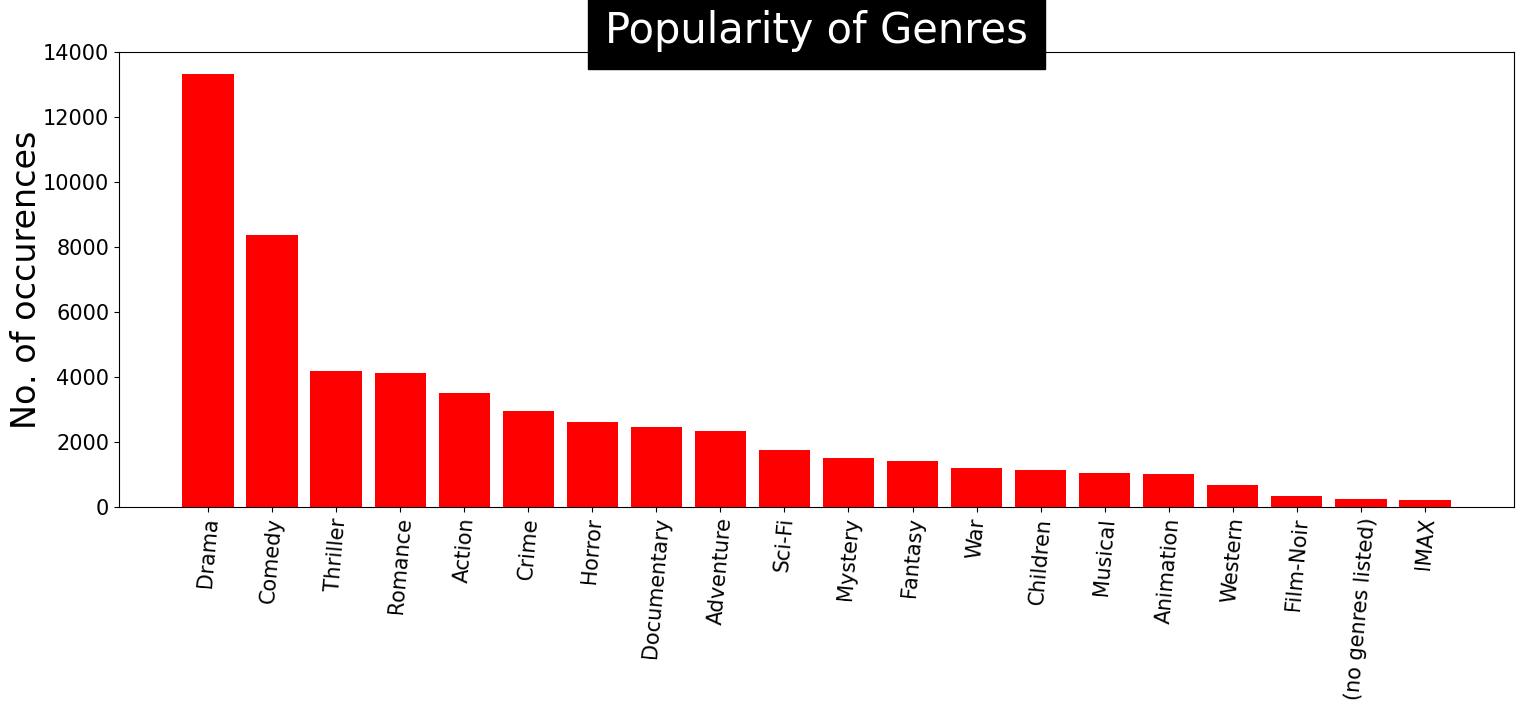

In [44]:
# let's display the same result in the histogram
fig = plt.figure(1, figsize=(18, 13))
ax2 = fig.add_subplot(2, 1, 2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k, i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()